In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/Admission_Predict.csv')

In [3]:
## Show 5 random rows
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
17,18,319,106,3,4.0,3.0,8.00,1,0.65
214,215,331,117,4,4.5,5.0,9.42,1,0.94
180,181,300,104,3,3.5,3.0,8.16,0,0.71
231,232,319,106,3,3.5,2.5,8.33,1,0.74
100,101,322,107,3,3.5,3.5,8.46,1,0.71


In [4]:
## remove serial number
data.drop('Serial No.', axis=1, inplace=True)

In [5]:
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
73,314,108,4,4.5,4.0,9.04,1,0.84
130,339,114,5,4.0,4.5,9.76,1,0.96
274,315,100,1,2.0,2.5,7.95,0,0.58
211,328,110,4,5.0,4.0,9.14,1,0.82
59,311,104,2,2.0,2.0,8.30,0,0.42


In [6]:
data.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
207,310,102,3,3.5,4.0,8.02,1,0.66
35,320,110,5,5.0,5.0,9.20,1,0.88
67,316,107,2,3.5,3.5,8.64,1,0.57
374,315,105,2,2.0,2.5,7.65,0,0.39
275,322,110,3,3.5,3.0,8.96,1,0.78


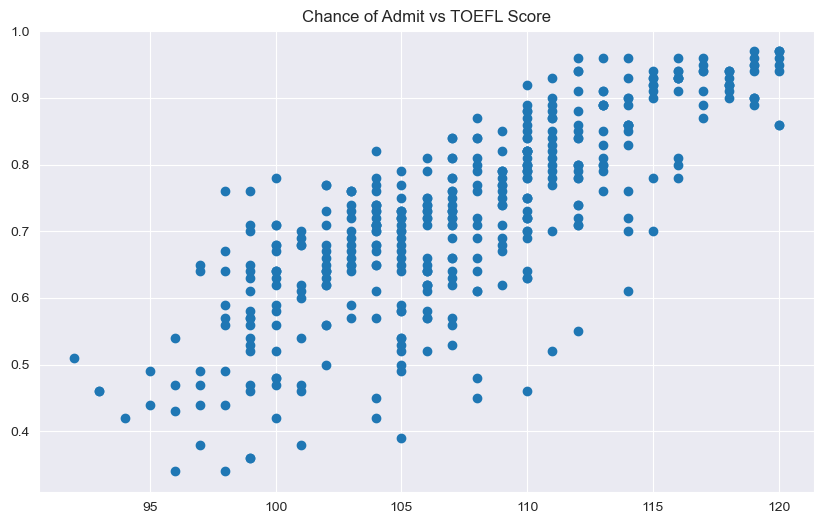

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['TOEFL Score'], y=data['Chance of Admit '])
plt.title('Chance of Admit vs TOEFL Score')
plt.show()

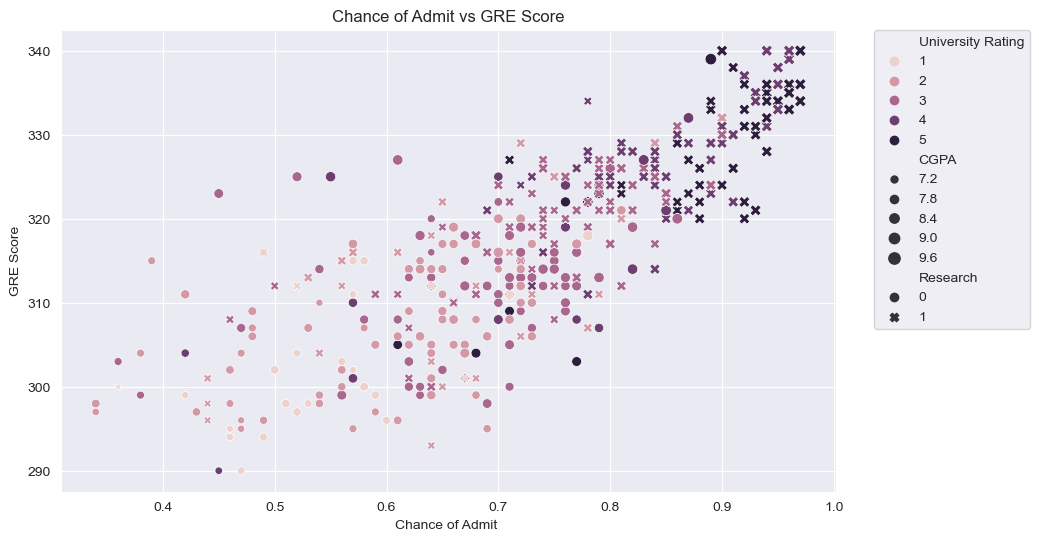

In [8]:
# show Chance of Admit on GRE Score TOEFL Score University Rating	SOP	LOR	CGPA Research	
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Chance of Admit ', y='GRE Score', hue='University Rating', size='CGPA', style='Research', data=data)
plt.title('Chance of Admit vs GRE Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [9]:
# check for null values
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
# remove all spaces from column names
data.columns = data.columns.str.replace(' ', '')

In [11]:
X = data.drop('ChanceofAdmit', axis=1)
y = data['ChanceofAdmit']

In [12]:
X = data.drop('ChanceofAdmit', axis=1)
y = data['ChanceofAdmit']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [15]:
print(regressor.intercept_)

-1.2302337510969905


In [16]:
# to retreive the slope
print(regressor.coef_)

[ 0.00186251  0.00272369  0.00737745 -0.00029274  0.01577024  0.11466916
  0.02222705]


In [17]:
# to retreive the slope
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GREScore,0.001863
TOEFLScore,0.002724
UniversityRating,0.007377
SOP,-0.000293
LOR,0.015770
CGPA,0.114669
Research,0.022227


In [18]:
print(regressor.score(x_train, y_train))

0.7951946003191085


In [19]:
print(regressor.score(x_test, y_test))


0.821208259148699


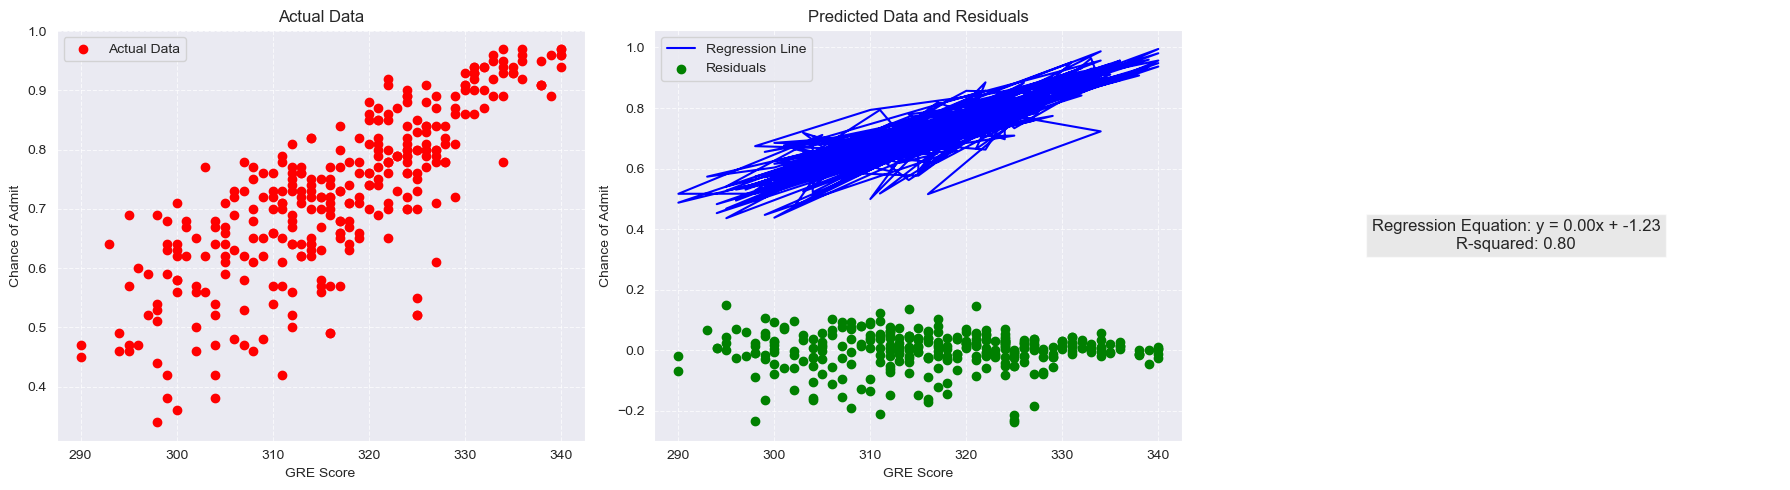

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot for actual data
ax1.scatter(x_train['GREScore'], y_train, color='red', label='Actual Data')
ax1.set_title('Actual Data')
ax1.set_xlabel('GRE Score')
ax1.set_ylabel('Chance of Admit')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

# Plot regression line for predicted data
y_pred = regressor.predict(x_train)
ax2.plot(x_train['GREScore'], y_pred, color='blue', label='Regression Line')
ax2.scatter(x_train['GREScore'], y_train - y_pred, color='green', label='Residuals')
ax2.set_title('Predicted Data and Residuals')
ax2.set_xlabel('GRE Score')
ax2.set_ylabel('Chance of Admit')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.legend()

# Display regression equation and correlation coefficient
equation = f'Regression Equation: y = {regressor.coef_[0]:.2f}x + {regressor.intercept_:.2f}'
r_squared = f'R-squared: {r2_score(y_train, y_pred):.2f}'
ax3.text(0.5, 0.5, equation + '\n' + r_squared, ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
ax3.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



In [21]:
y_pred_test = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
print(df)

     Actual  Predicted
209    0.68   0.651174
280    0.68   0.723687
33     0.90   0.935368
210    0.79   0.821643
93     0.44   0.581587
..      ...        ...
246    0.72   0.721818
227    0.64   0.689644
369    0.67   0.594426
176    0.90   0.878406
289    0.79   0.757793

[80 rows x 2 columns]


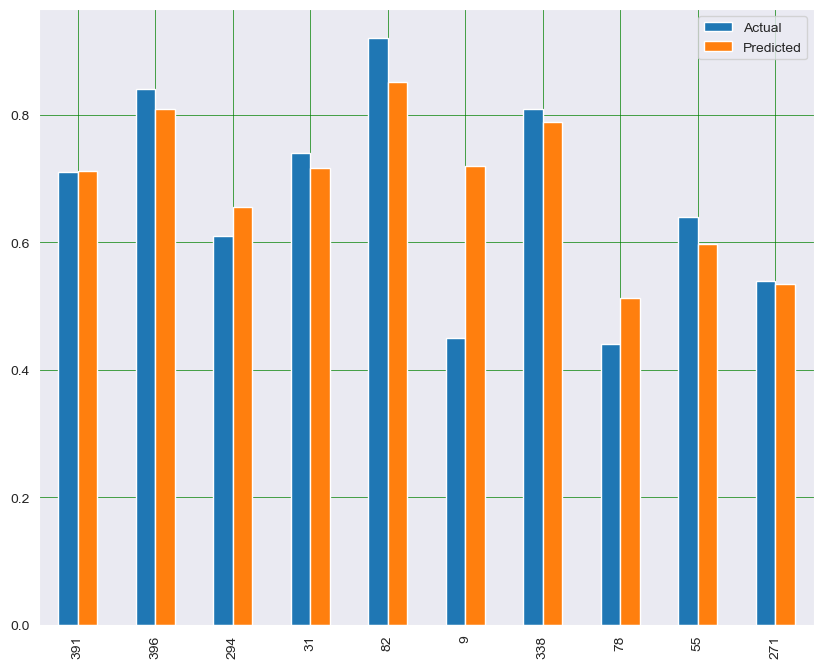

In [22]:
df1 = df.sample(10)
df1.plot(kind='bar', figsize=(10, 8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

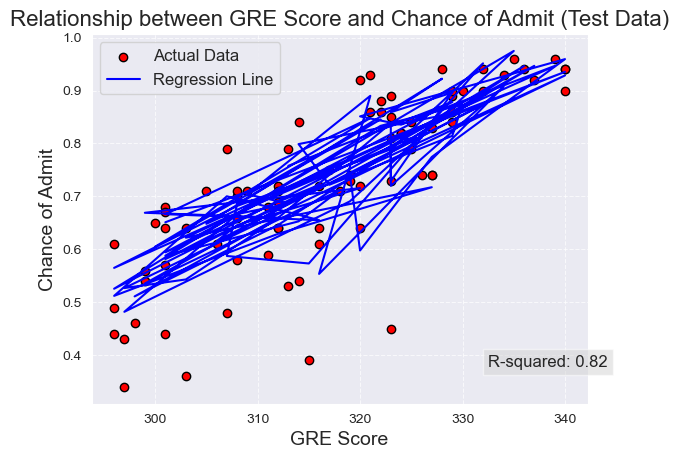

In [23]:
# Scatter plot for actual test data
plt.scatter(x_test['GREScore'], y_test, color='red', label='Actual Data', edgecolors='black')

# Plot regression line for predicted test data
plt.plot(x_test['GREScore'], y_pred_test, color='blue', label='Regression Line')

# Title and labels
plt.title('Relationship between GRE Score and Chance of Admit (Test Data)', fontsize=16)
plt.xlabel('GRE Score', fontsize=14)
plt.ylabel('Chance of Admit', fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Display R-squared value
r_squared = r2_score(y_test, y_pred_test)
plt.text(0.8, 0.1, f'R-squared: {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.047956733620911976
Mean Squared Error: 0.004617003377285015
Root Mean Squared Error: 0.06794853476922821
